<a href="https://colab.research.google.com/github/FranMoritz/Projeto-Loja-Stilo-/blob/main/Analise_Exploratoria_Sinistros_PRF_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#acessando o drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
#importando as libs usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
#chamando o arquivo em um data frame
df_pf_sin = pd.read_csv("/content/gdrive/My Drive/policiafederal/datatran2025.csv",
                            delimiter=';',
                            encoding='latin1' #'utf-8' 'latin1'
                            )

In [37]:
df_pf_sin2024 = pd.read_csv("/content/gdrive/My Drive/policiafederal/datatran2024.csv",
                            delimiter=';',
                            encoding='latin1' #'utf-8' 'latin1'
                            )

In [21]:
df_pf_sin.shape

(47192, 30)

## Sinistros de Trânsito Agrupados Por **Ocorrência**

Pergunta de Negócio: A PRF tem o objetivo de fazer ações de conciêntização no trânsito, aumentar a fiscalização com intuito de diminuir drasticamente o número de acidentes. Sua necessidade de momento é saber quais são os pontos críticos e ponto de partida para atuação.



In [24]:
df_pf_sin.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


In [36]:
df_pf_sin.tail()


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
47187,719592,2025-08-30,sábado,11:10:00,ES,101,"295,6",CARIACICA,Objeto estático sobre o leito carroçável,Tombamento,...,0,0,0,1,1,"-20,33713308","-40,40256354",SPRF-ES,DEL01-ES,UOP01-DEL01-ES
47188,719614,2025-08-12,terça-feira,06:40:00,GO,40,6,VALPARAISO DE GOIAS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-16,09332019","-47,98278809",SPRF-DF,DEL01-DF,UOP01-DEL01-DF
47189,719649,2025-08-13,quarta-feira,19:00:00,SP,116,154,SAO JOSE DOS CAMPOS,Objeto estático sobre o leito carroçável,Colisão com objeto,...,0,0,0,1,1,"-23,23953218","-45,9210813",SPRF-SP,DEL02-SP,UOP01-DEL02-SP
47190,719700,2025-08-30,sábado,15:05:00,BA,415,57,ITABUNA,Ausência de reação do condutor,Saída de leito carroçável,...,1,0,0,2,1,"-14,851068","-39,378282",SPRF-BA,DEL05-BA,UOP01-DEL05-BA
47191,719768,2025-07-14,segunda-feira,08:00:00,PB,230,"22,7",JOAO PESSOA,Acessar a via sem observar a presença dos outr...,Colisão lateral mesmo sentido,...,0,1,0,3,2,"-7,1533967","-34,8547196",SPRF-PB,DEL01-PB,UOP01-DEL01-PB


In [25]:
df_pf_sin.dtypes

,0
id,int64
data_inversa,object
dia_semana,object
horario,object
uf,object
br,int64
km,object
municipio,object
causa_acidente,object
tipo_acidente,object


In [32]:
print(df_pf_sin.isnull().sum())

id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                         0
km                         0
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     1
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                   1
delegacia                 15
uop                       22
dtype: int64


In [33]:
#Função para gerar metadados com representação de cardinalidade e nulos
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe
metadata_df = generate_metadata(df_pf_sin)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.00,47192
1,veiculos,int64,0,0.00,20
2,br,int64,0,0.00,110
3,feridos,int64,0,0.00,30
4,ignorados,int64,0,0.00,18
5,ilesos,int64,0,0.00,54
6,feridos_graves,int64,0,0.00,14
7,feridos_leves,int64,0,0.00,26
8,mortos,int64,0,0.00,10
9,pessoas,int64,0,0.00,60


In [35]:
#Estatísticas descritivas geral (dados numéricos e descritivos)
df_pf_sin.describe(include='all')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
count,47192.000000,47192,47192,47192,47192,47192.000000,47192,47192,47192,47192,...,47192.000000,47192.000000,47192.000000,47192.000000,47192.000000,47192,47192,47191,47177,47170
unique,NaN,243,7,1366,27,NaN,6856,1769,69,17,...,NaN,NaN,NaN,NaN,NaN,44539,44529,28,153,394
top,NaN,2025-05-10,sábado,19:00:00,MG,NaN,2,BRASILIA,Ausência de reação do condutor,Colisão traseira,...,NaN,NaN,NaN,NaN,NaN,"-22,7147776","-43,0309376",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,NaN,264,7513,706,6178,NaN,236,664,7327,9373,...,NaN,NaN,NaN,NaN,NaN,19,15,6168,1675,777
mean,685321.198275,NaN,NaN,NaN,NaN,208.506039,NaN,NaN,NaN,NaN,...,0.275131,1.056302,0.395660,1.147716,2.004535,NaN,NaN,NaN,NaN,NaN
std,19871.776657,NaN,NaN,NaN,NaN,128.448197,NaN,NaN,NaN,NaN,...,0.603292,1.805962,0.894184,1.117072,1.153761,NaN,NaN,NaN,NaN,NaN
min,652468.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,665804.750000,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,689988.500000,NaN,NaN,NaN,NaN,156.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,702825.250000,NaN,NaN,NaN,NaN,319.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [38]:
df_pf_sin2024.describe(include='all')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
count,73156.000000,73156,73156,73156,73156,73156.000000,73156,73156,73156,73156,...,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73153,73120,73044
unique,NaN,366,7,1415,27,NaN,7683,1833,69,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,152,394
top,NaN,2024-12-21,domingo,19:00:00,MG,NaN,1,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,NaN,319,11741,1117,9296,NaN,365,1056,10920,13960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9267,2667,1245
mean,613003.770340,NaN,NaN,NaN,NaN,209.575004,NaN,NaN,NaN,NaN,...,0.278091,1.048103,0.395661,1.155421,1.985811,-18.810858,-46.395744,NaN,NaN,NaN
std,23344.408649,NaN,NaN,NaN,NaN,128.818508,NaN,NaN,NaN,NaN,...,0.635996,1.746499,0.822872,1.253310,1.083471,7.722916,6.214783,NaN,NaN,NaN
min,571772.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,-33.680584,-72.641548,NaN,NaN,NaN
25%,593042.750000,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,1.000000,-25.103899,-50.212551,NaN,NaN,NaN
50%,613246.500000,NaN,NaN,NaN,NaN,158.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,1.000000,2.000000,-20.411868,-47.009041,NaN,NaN,NaN
75%,633190.250000,NaN,NaN,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,1.000000,2.000000,-12.588467,-42.184893,NaN,NaN,NaN


# Observações :



*   **Quantidade de acidentes:** 47.192 ocorrências distintas de janeiro a agosto de 2025, sendo 194,2 acidentes dia. Se mantiver a média diária, tendo em vista os 96 dias para o término do ano, teremos 65.835,2 acidentes, em comparação com 2024 onde foram 73156.

*   **Data:** O dia do ano até o momento com maior frequência de acidentes é 10/05/2025 com 264 ocorrências;


*   **Dia da semana:** O dia da semana com maior frequência de acidentes é sábado com 7.513 ocorrências. Em comparação com dados de 2024 onde o dia com maior ocorrências foi no domingo, podemos dizer que existe maior fluxo de pessoas viajando nos finais de semana.

*  **Horário:** O horário com maior frequência de acidentes é 19h, mesmo horário com comparação com os dados de 2024. Aqui podemos nos atentar a causas como luminosidade ou volta para casa.



*   **Município:** O município com maior incidência de acidentes até o momento é Brasilia no estado de Minas Gerais com 664 ocorrências. Em 2024 este mesmo município foi apontado com maior quantidade 1056 ocorrências. Trás um ponto de atenção para esse município.

*  **Causa do Acidente:** Até o momento a Ausência de reação tem um número de 7.327 ocorrências.


*   **Tipos de Acidente:** Colisão traseira com 9.373 ocorrências. Em comparação com 2024, este mesmo motivo teve destaque com 13.960 ocorrências.

*   **Média de Feridos:** 1.14 com uma máxima de 49 pessoas.


*  **Veículos:** em média 2 veículos. **texto em negrito**














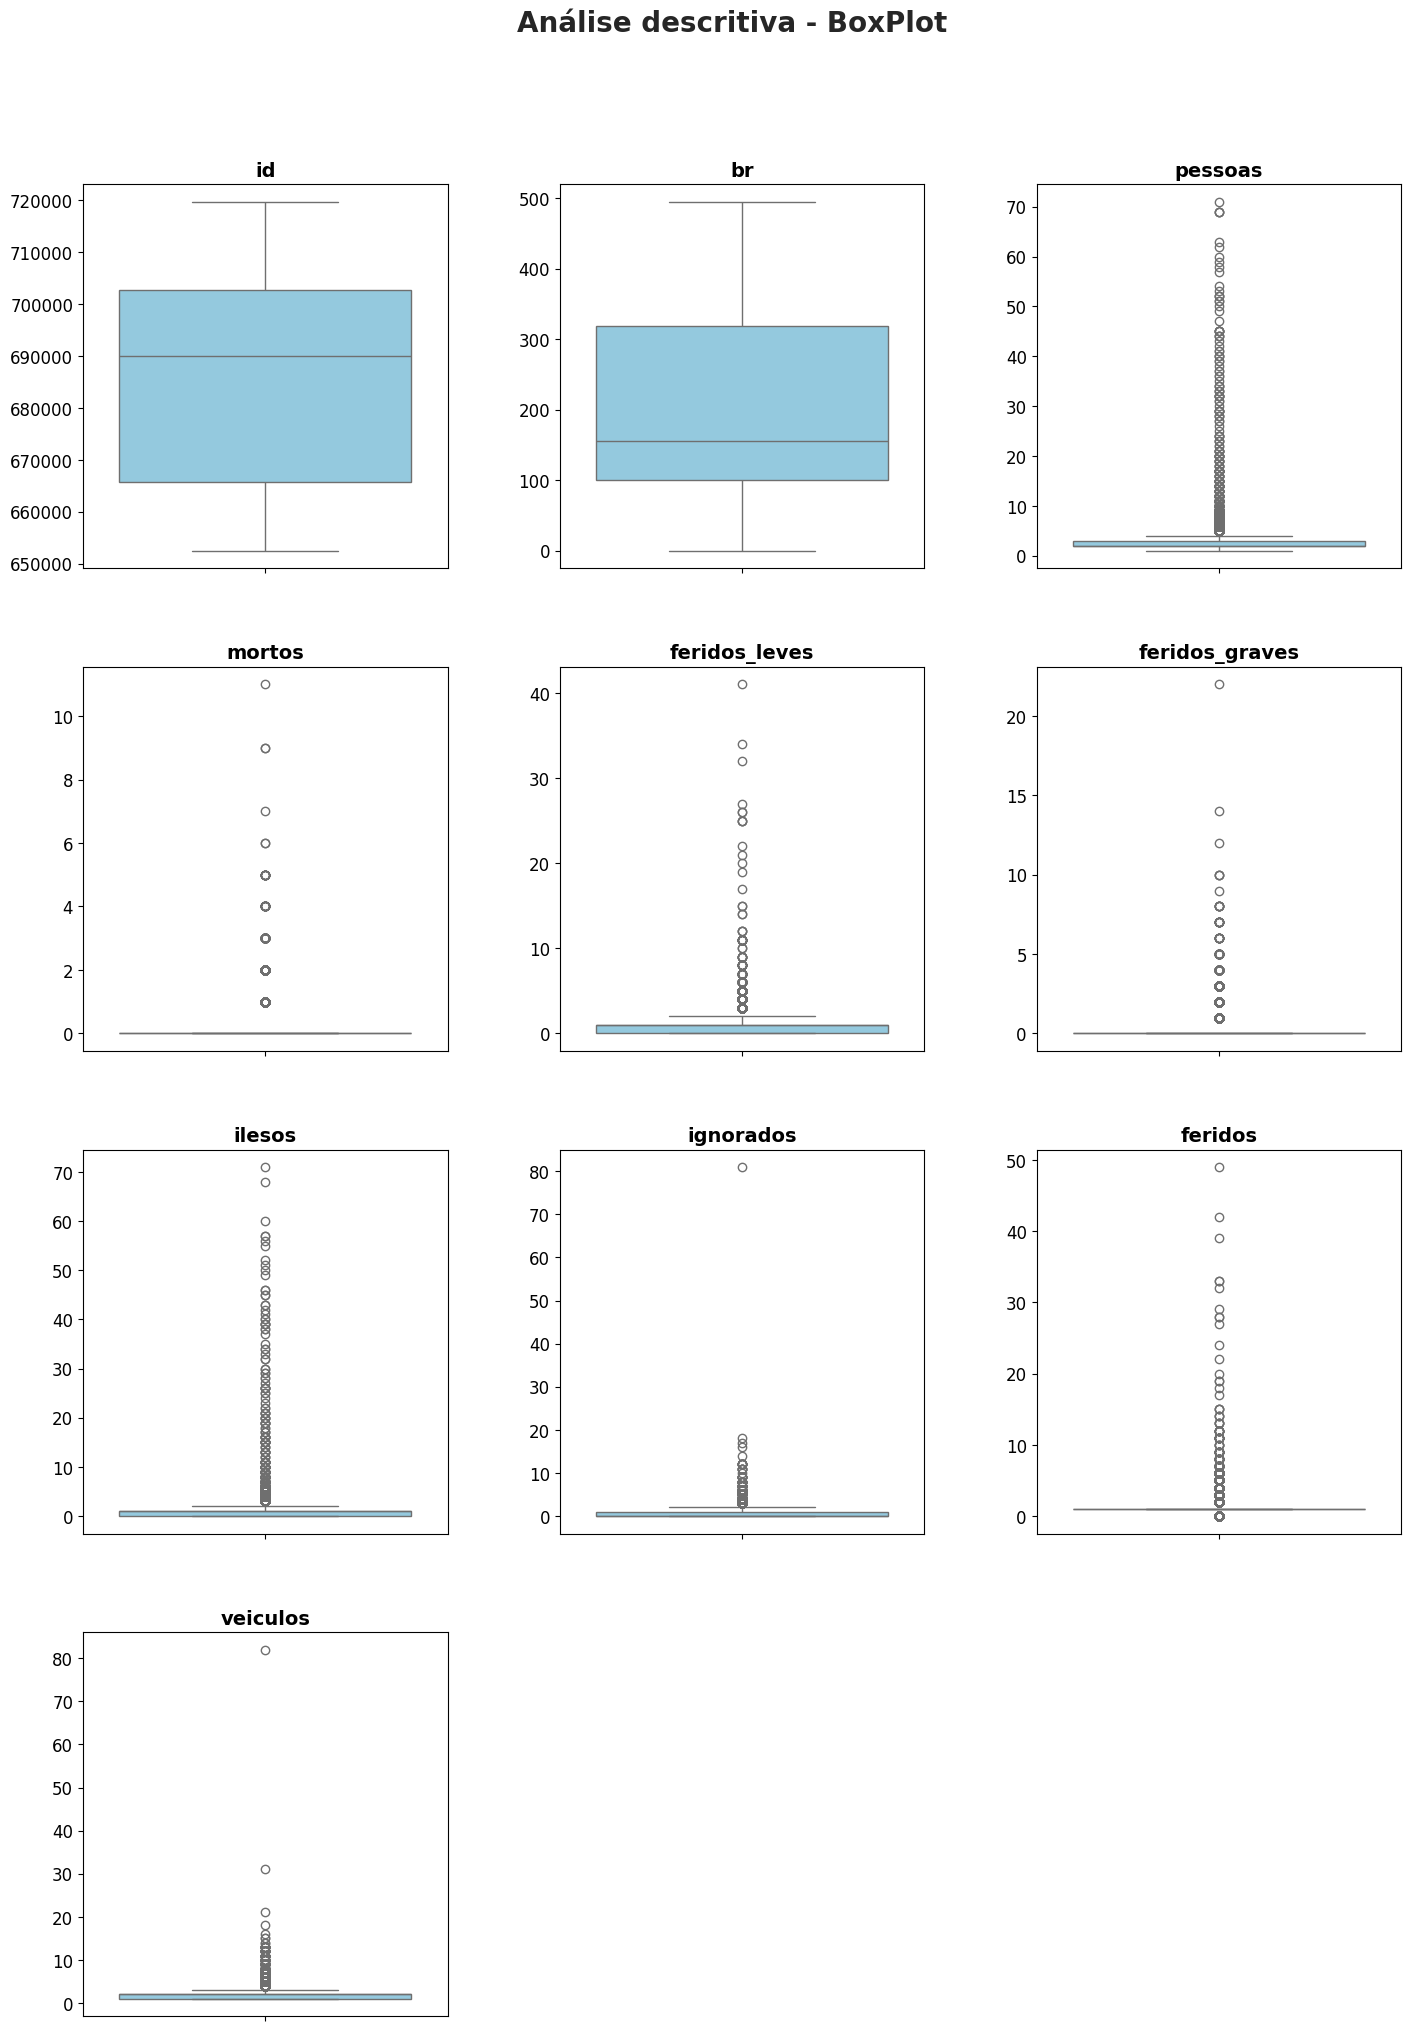

In [39]:
def pod_academy_box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
pod_academy_box_plot(df_pf_sin)

Podemos observar que em todos os gráficos a maior quantidade de ocorrências está dentro da média, que é proximo de zero. Alguns outliers informam que eventualmente temos acientes com maior número de pessoas envolvidas, feridos e maior quantidade de veículos por acidente, mas que não é significativo.




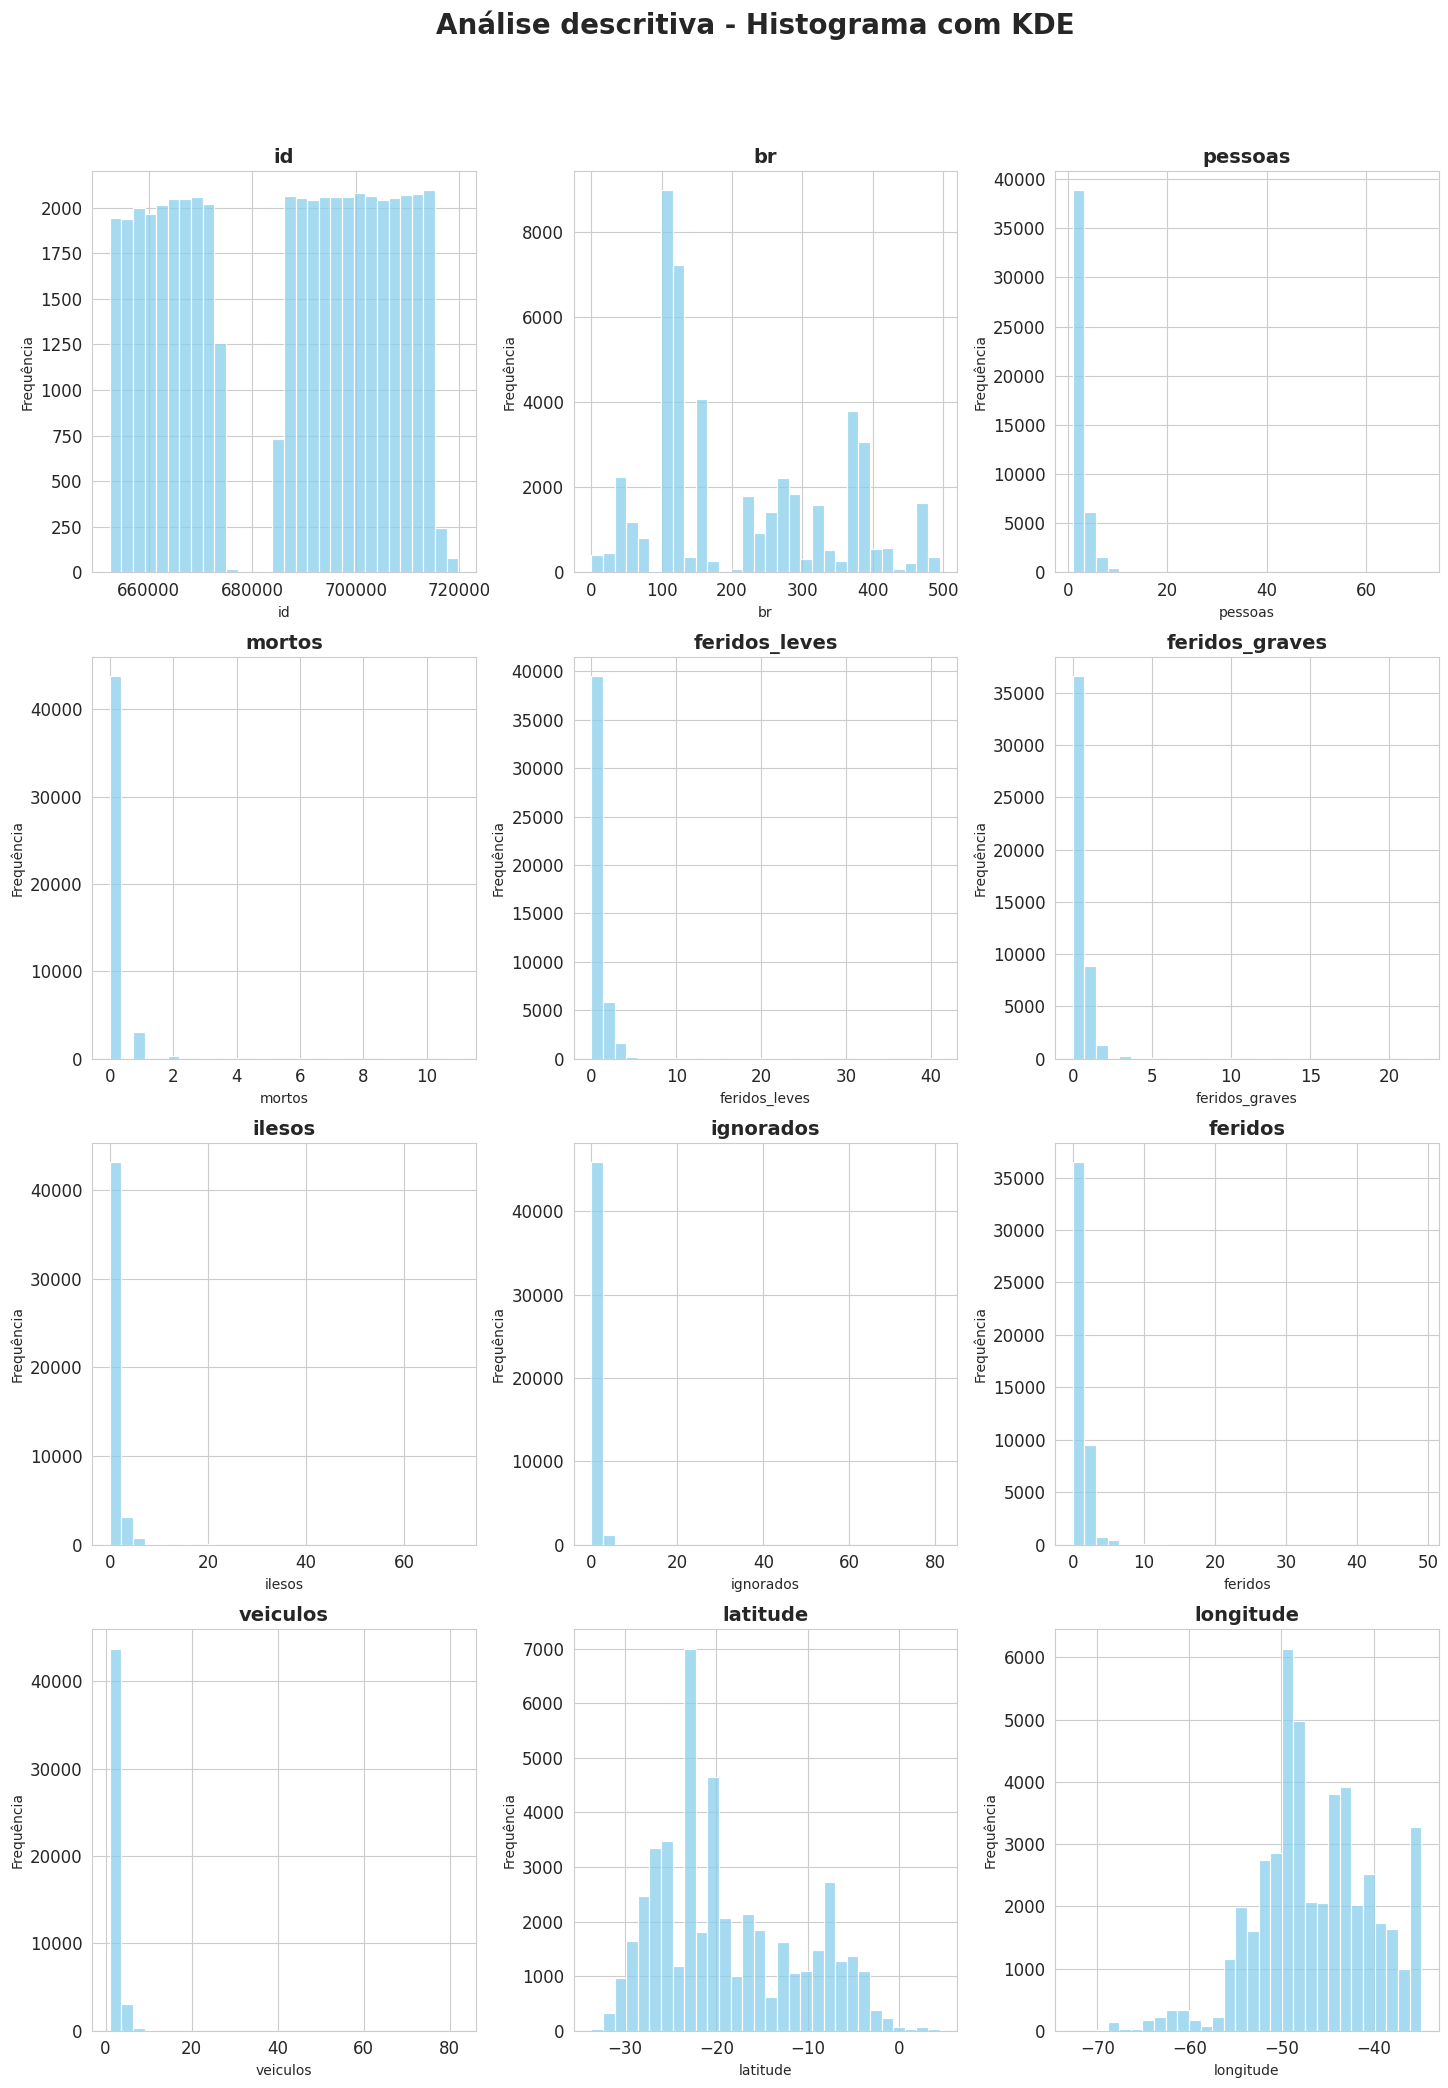

In [50]:
def histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=False)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
histograms(df_pf_sin)

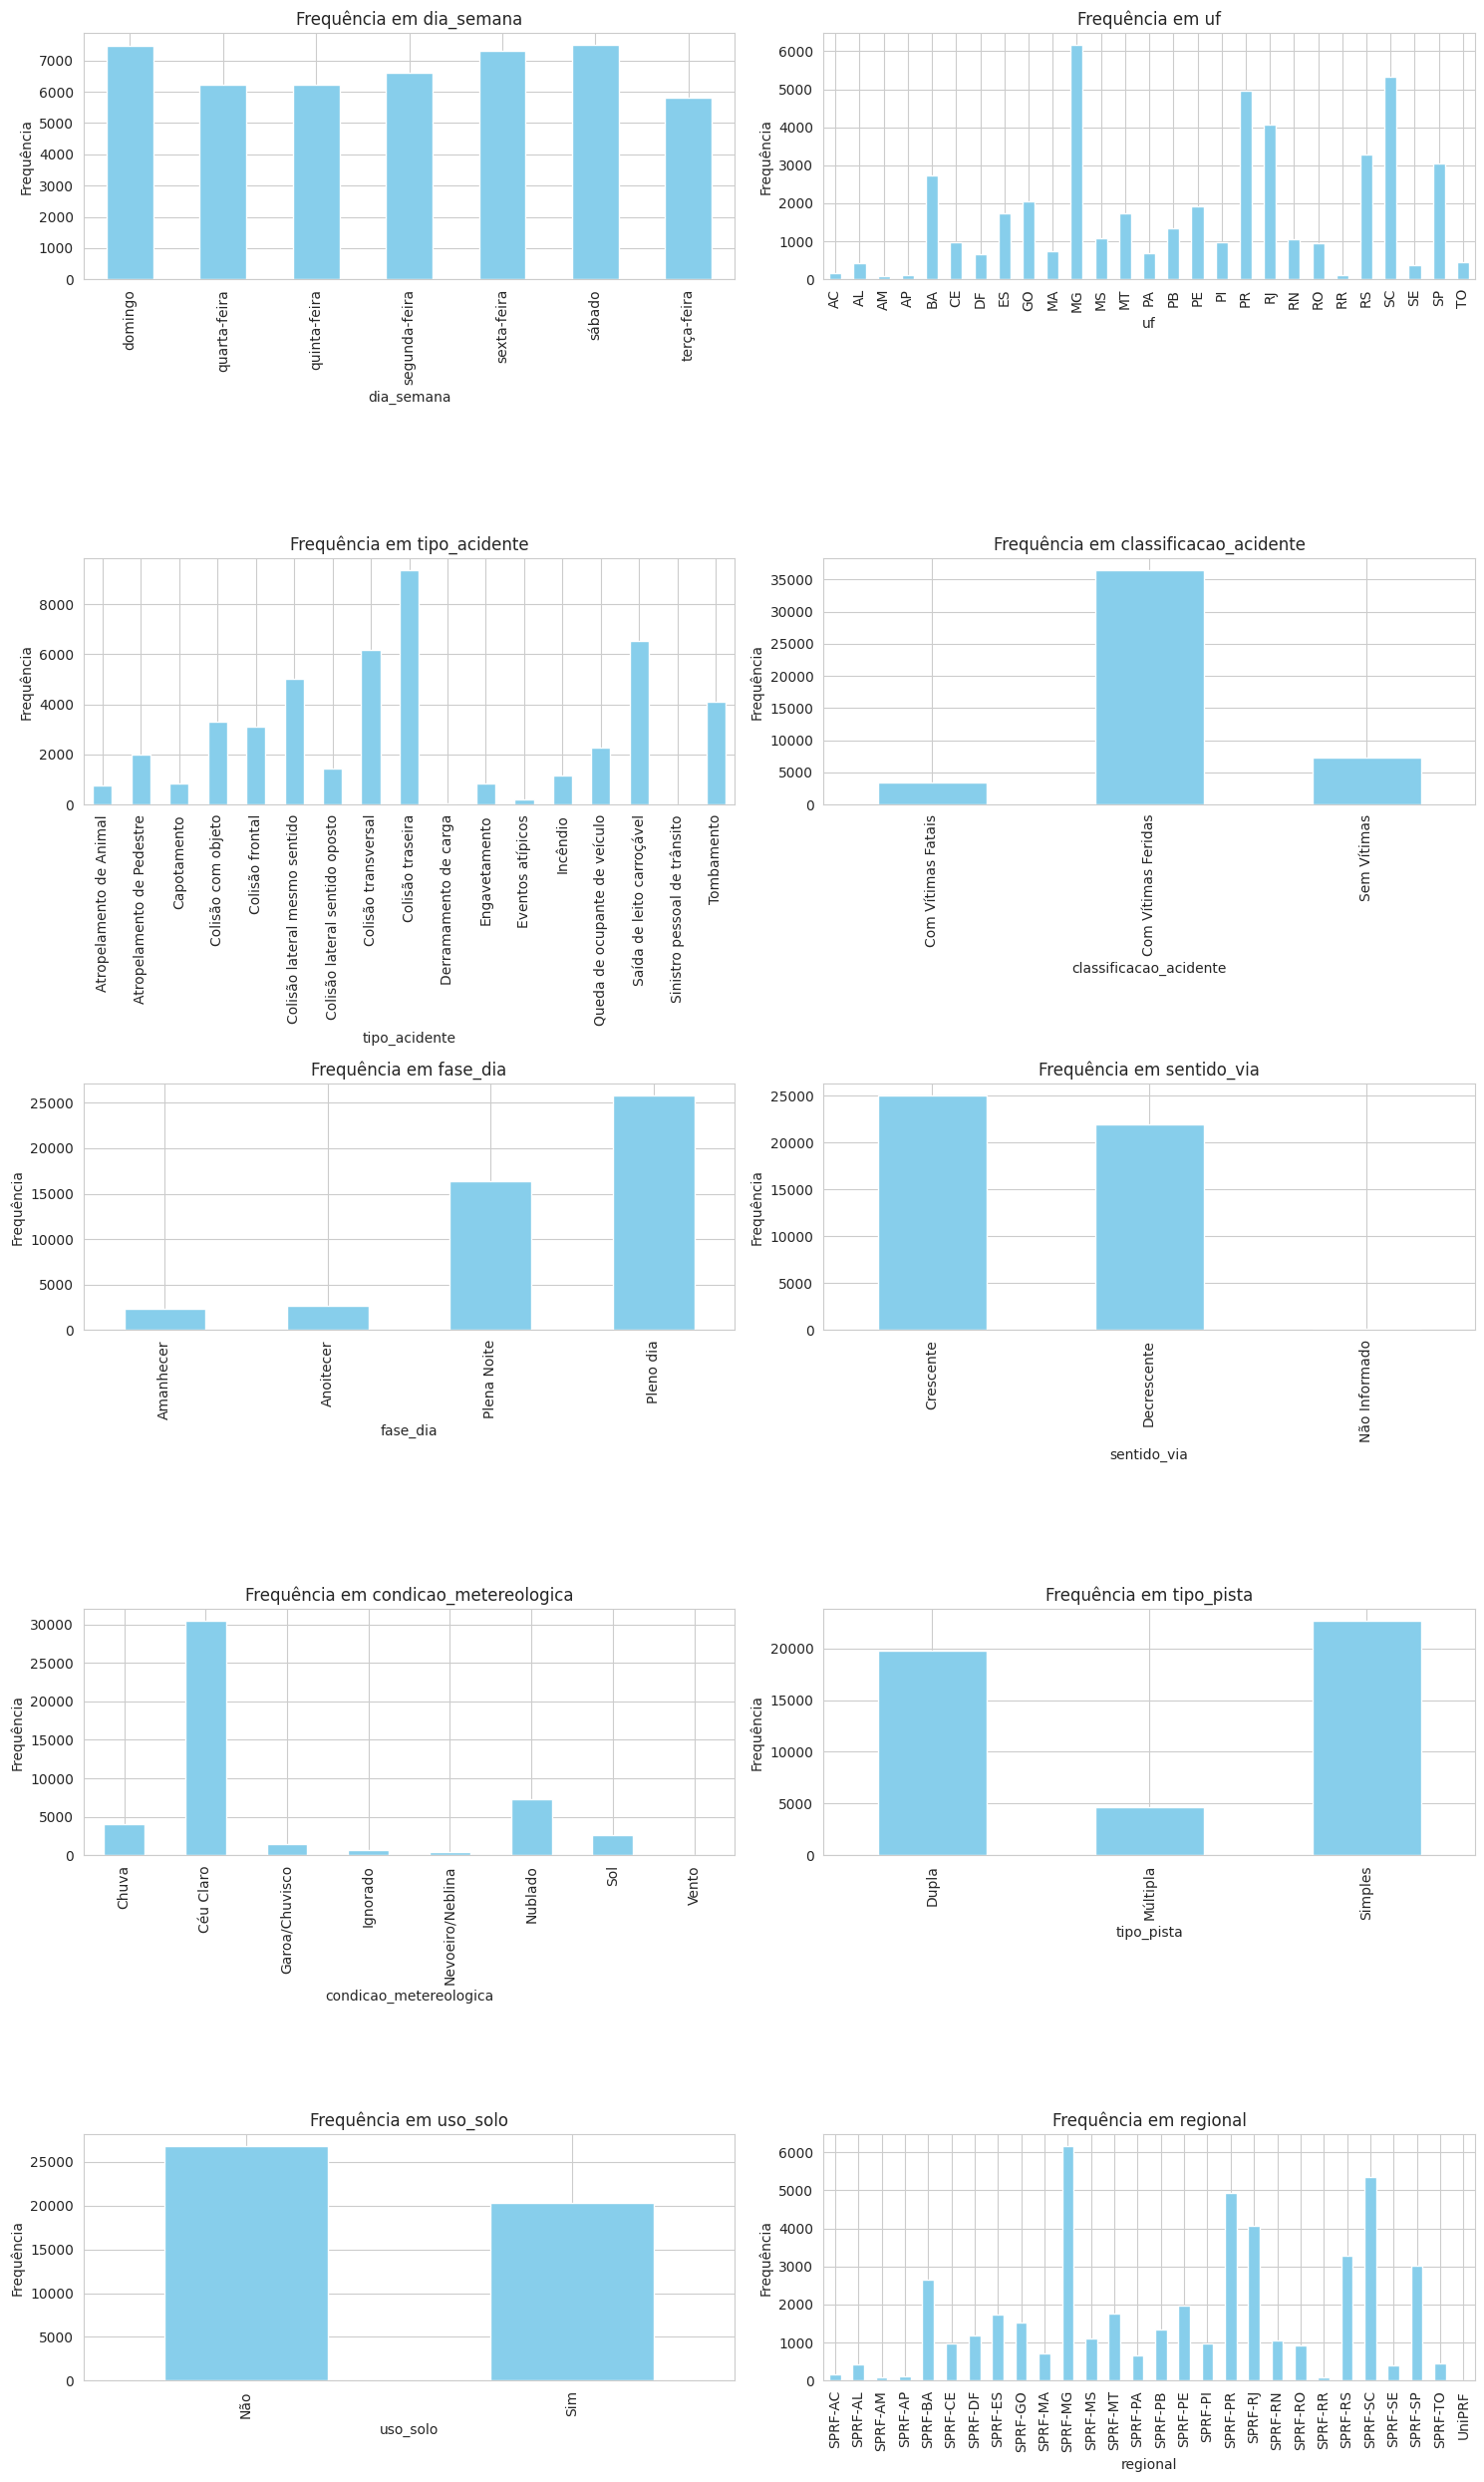

In [41]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df_pf_sin, corte_cardinalidade=30, graficos_por_linha=2)


Com os gráficos de barras podemos verficar que as ações para reduzir o número de ocorrências de acidentes devem ser nos estados de MG, SC, PR com maior número, posteriormente RS, RJ e SP.

As fiscalizações devem ocorrer com maior ênfase aos finais de semana próximo ao final do dia em pistas de faixas simples.

